# 📊 Comprehensive EDA and Predictive Modeling on Monthly Food Distribution Data

---

## 🎯 Project Overview

This notebook presents an **end-to-end data science analysis** of India's Public Distribution System (PDS) monthly food distribution data. Our goal is to:

1. **Understand** the data through comprehensive exploratory analysis
2. **Discover** patterns, trends, and anomalies in food distribution
3. **Build** 20-25 machine learning models for multiple prediction targets
4. **Interpret** results and extract actionable insights
5. **Tell a data story** that reveals how food distribution operates across India

---

## 📋 Analysis Structure

### **Phase 1**: Data Understanding & Loading
### **Phase 2**: Exploratory Data Analysis (EDA)
### **Phase 3**: Feature Engineering
### **Phase 4**: Machine Learning Modeling (20-25 Models)
### **Phase 5**: Model Interpretation & Storytelling

---

**Author**: Data Science Team  
**Dataset**: monthly-food-distribution-data.csv (63,427 records)  
**Date**: November 2, 2025

---

# 📦 Phase 1: Data Understanding & Loading

In this phase, we will:
- Import necessary libraries
- Load the dataset
- Examine basic structure and properties
- Identify data quality issues
- Understand the variables

## 1.1 Import Required Libraries

In [33]:
# Data Processing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set Plotly renderer for notebook compatibility
pio.renderers.default = "notebook"

# Statistical Analysis
from scipy import stats
from scipy.stats import skew, kurtosis, normaltest

# Date/Time
from datetime import datetime
import calendar

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Libraries imported successfully!")
print(f"   Pandas version: {pd.__version__}")
print(f"   NumPy version: {np.__version__}")
print(f"   Plotly renderer: {pio.renderers.default}")

✅ Libraries imported successfully!
   Pandas version: 2.2.3
   NumPy version: 1.26.4
   Plotly renderer: notebook


## 1.1.1 Plotly Configuration Helper

This cell provides helper functions to ensure Plotly visualizations display correctly in different environments.

In [ ]:
# Helper function to display Plotly figures
def display_plotly(fig, title=None):
    """
    Display Plotly figure with fallback options for different environments
    """
    if title:
        fig.update_layout(title_text=title)
    
    # Try different display methods
    try:
        # Method 1: Direct display (works in most Jupyter environments)
        from IPython.display import display
        display(fig)
    except:
        try:
            # Method 2: Use show method as fallback
            fig.show()
        except:
            # Method 3: Return figure object (can be displayed by notebook automatically)
            return fig

# Test the configuration
print("✅ Plotly configuration helper loaded!")
print(f"   Current renderer: {pio.renderers.default}")
print(f"   Available renderers: {', '.join(pio.renderers)}")

# You can change the renderer if needed:
# For Kaggle/Colab: pio.renderers.default = "notebook" or "colab"
# For JupyterLab: pio.renderers.default = "jupyterlab"
# For VS Code: pio.renderers.default = "notebook" or "vscode"


✅ Plotly configuration helper loaded!
   Current renderer: notebook
   Available renderers: plotly_mimetype, jupyterlab, nteract, vscode, notebook, notebook_connected, kaggle, azure, colab, cocalc, databricks, json, png, jpeg, jpg, svg, pdf, browser, firefox, chrome, chromium, iframe, iframe_connected, sphinx_gallery, sphinx_gallery_png


### 🎨 Visualization Troubleshooting

**If Plotly plots are not displaying:**

1. **Run the library import cell again** (Cell 4) - This sets the renderer to 'notebook'
2. **Try changing the renderer** if you're on a different platform:
   ```python
   import plotly.io as pio
   pio.renderers.default = "kaggle"  # For Kaggle
   # Or: "colab" for Google Colab
   # Or: "jupyterlab" for JupyterLab
   # Or: "vscode" for VS Code
   ```
3. **Restart the kernel** and run all cells from the beginning

**For static plots (matplotlib/seaborn):** These should work without any configuration.

## 1.2 Load the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/monthly-food-distribution-data/monthly-food-distribution-data.csv')

print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Dataset loaded successfully!

📊 Dataset Shape: 63,425 rows × 34 columns

💾 Memory Usage: 27.05 MB


## 1.3 Initial Data Inspection

In [4]:
# Display first few rows
print("\n" + "="*80)
print("📋 FIRST 10 ROWS OF THE DATASET")
print("="*80)
df.head(10)


📋 FIRST 10 ROWS OF THE DATASET


,id,month,state_name,state_code,district_name,district_code,total_rice_allocated_unautomated,total_wheat_allocated_unautomated,total_coarse_grain_allocated_unautomated,total_fortified_rice_allocated_unautomated,total_qty_allocated_unautomated,total_rice_allocated_automated,total_wheat_allocated_automated,total_coarse_grain_allocated_automated,total_fortified_rice_allocated_automated,total_qty_allocated_automated,total_rice_qty_allocated,total_wheat_qty_allocated,total_coarse_grain_qty_allocated,total_fortified_rice_qty_allocated,total_qty_allocated,total_rice_distributed_unautomated,total_wheat_distributed_unautomated,total_coarse_grain_distributed_unautomated,total_fortified_rice_distributed_unautomated,total_qty_distributed_unautomated,percent_qty_distributed_unautomated,total_rice_distributed_automated,total_wheat_distributed_automated,total_coarse_grain_distributed_automated,total_fortified_rice_distributed_automated,total_qty_distributed_automated,percentage_qty_distributed_automated,total_qty_distributed_epos
0,0,2017-01-01,Kerala,32,Kannur,557,4159.63,1001.20,0.00,0.00,5160.83,0.00,0.00,0.00,0.00,0.00,4159.63,1001.20,0.00,0.00,5160.83,3927.24,973.97,0.00,0.00,4901.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4901.21
1,1,2017-01-01,Kerala,32,Kozhikode,561,6441.46,1550.43,0.00,0.00,7991.89,0.00,0.00,0.00,0.00,0.00,6441.46,1550.43,0.00,0.00,7991.89,6111.81,1480.11,0.00,0.00,7591.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7591.92
2,2,2017-01-01,Kerala,32,Pathanamthitta,564,2343.70,564.12,0.00,0.00,2907.81,0.00,0.00,0.00,0.00,0.00,2343.70,564.12,0.00,0.00,2907.81,2154.24,540.39,0.00,0.00,2694.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2694.63
3,3,2017-01-01,Kerala,32,Thrissur,566,6204.74,1493.45,0.00,0.00,7698.19,0.00,0.00,0.00,0.00,0.00,6204.74,1493.45,0.00,0.00,7698.19,5913.73,1443.37,0.00,0.00,7357.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7357.10
4,4,2017-01-01,Mizoram,15,Lunglei,265,650.85,0.00,0.00,0.00,650.85,0.00,0.00,0.00,0.00,0.00,650.85,0.00,0.00,0.00,650.85,650.85,0.00,0.00,0.00,650.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,650.85
5,5,2017-02-01,Kerala,32,Kannur,557,4159.63,1001.20,0.00,0.00,5160.83,0.00,0.00,0.00,0.00,0.00,4159.63,1001.20,0.00,0.00,5160.83,3972.45,983.70,0.00,0.00,4956.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4956.15
6,6,2017-02-01,Kerala,32,Pathanamthitta,564,2343.70,564.12,0.00,0.00,2907.81,0.00,0.00,0.00,0.00,0.00,2343.70,564.12,0.00,0.00,2907.81,2250.26,552.69,0.00,0.00,2802.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2802.95
7,7,2017-02-01,Mizoram,15,Lunglei,265,651.10,0.00,0.00,0.00,651.10,0.00,0.00,0.00,0.00,0.00,651.10,0.00,0.00,0.00,651.10,651.10,0.00,0.00,0.00,651.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,651.10
8,8,2017-03-01,Kerala,32,Kannur,557,4159.63,1001.20,0.00,0.00,5160.83,0.00,0.00,0.00,0.00,0.00,4159.63,1001.20,0.00,0.00,5160.83,3998.41,985.91,0.00,0.00,4984.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4984.32
9,9,2017-03-01,Kerala,32,Pathanamthitta,564,2343.70,564.12,0.00,0.00,2907.81,0.00,0.00,0.00,0.00,0.00,2343.70,564.12,0.00,0.00,2907.81,2197.76,539.13,0.00,0.00,2736.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2736.89


In [5]:
# Display last few rows
print("\n" + "="*80)
print("📋 LAST 10 ROWS OF THE DATASET")
print("="*80)
df.tail(10)


📋 LAST 10 ROWS OF THE DATASET


,id,month,state_name,state_code,district_name,district_code,total_rice_allocated_unautomated,total_wheat_allocated_unautomated,total_coarse_grain_allocated_unautomated,total_fortified_rice_allocated_unautomated,total_qty_allocated_unautomated,total_rice_allocated_automated,total_wheat_allocated_automated,total_coarse_grain_allocated_automated,total_fortified_rice_allocated_automated,total_qty_allocated_automated,total_rice_qty_allocated,total_wheat_qty_allocated,total_coarse_grain_qty_allocated,total_fortified_rice_qty_allocated,total_qty_allocated,total_rice_distributed_unautomated,total_wheat_distributed_unautomated,total_coarse_grain_distributed_unautomated,total_fortified_rice_distributed_unautomated,total_qty_distributed_unautomated,percent_qty_distributed_unautomated,total_rice_distributed_automated,total_wheat_distributed_automated,total_coarse_grain_distributed_automated,total_fortified_rice_distributed_automated,total_qty_distributed_automated,percentage_qty_distributed_automated,total_qty_distributed_epos
63415,63415,2023-09-01,West Bengal,19,Uttar Dinajpur,311,0.00,0.00,0.00,0.00,0.00,0.00,4818.51,0.00,7227.76,12046.27,0.00,4818.51,0.00,7227.76,12046.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4563.99,0.00,6845.96,11409.94,0.00,11409.94
63416,63416,2023-09-01,West Bengal,19,Paschim Bardhaman,704,0.00,0.00,0.00,0.00,0.00,0.00,565.87,0.00,848.81,1414.68,0.00,565.87,0.00,848.81,1414.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,528.84,0.00,793.55,1322.40,0.00,1322.40
63417,63417,2023-09-01,West Bengal,19,Howrah,313,0.00,0.00,0.00,0.00,0.00,0.00,726.81,0.00,1090.22,1817.03,0.00,726.81,0.00,1090.22,1817.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,646.83,0.00,970.54,1617.37,0.00,1617.37
63418,63418,2023-09-01,West Bengal,19,Jhargram,703,0.00,0.00,0.00,0.00,0.00,0.00,2717.14,0.00,4075.72,6792.86,0.00,2717.14,0.00,4075.72,6792.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2559.99,0.00,3840.38,6400.37,0.00,6400.37
63419,63419,2023-09-01,West Bengal,19,Kolkata,315,0.00,0.00,0.00,0.00,0.00,0.00,1173.73,0.00,1760.60,2934.33,0.00,1173.73,0.00,1760.60,2934.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1007.40,0.00,1511.19,2518.59,0.00,2518.59
63420,63420,2023-09-01,West Bengal,19,Kolkata,315,0.00,0.00,0.00,0.00,0.00,0.00,2059.56,0.00,3089.34,5148.91,0.00,2059.56,0.00,3089.34,5148.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1793.58,0.00,2692.98,4486.57,0.00,4486.57
63421,63421,2023-09-01,West Bengal,19,Hooghly,312,0.00,0.00,0.00,0.00,0.00,0.00,1144.54,0.00,1716.81,2861.35,0.00,1144.54,0.00,1716.81,2861.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1044.01,0.00,1566.16,2610.17,0.00,2610.17
63422,63422,2023-09-01,West Bengal,19,Kolkata,315,0.00,0.00,0.00,0.00,0.00,0.00,848.50,0.00,1272.74,2121.24,0.00,848.50,0.00,1272.74,2121.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,717.84,0.00,1077.72,1795.56,0.00,1795.56
63423,63423,2023-09-01,West Bengal,19,Kalimpong,702,0.00,0.00,0.00,0.00,0.00,0.00,724.97,0.00,1087.45,1812.42,0.00,724.97,0.00,1087.45,1812.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,623.34,0.00,937.10,1560.44,0.00,1560.44
63424,63424,2023-09-01,West Bengal,19,Paschim Bardhaman,704,0.00,0.00,0.00,0.00,0.00,0.00,1833.43,0.00,2750.15,4583.59,0.00,1833.43,0.00,2750.15,4583.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1748.13,0.00,2622.30,4370.43,0.00,4370.43


In [6]:
# Dataset information
print("\n" + "="*80)
print("ℹ️  DATASET INFORMATION")
print("="*80)
df.info()


ℹ️  DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63425 entries, 0 to 63424
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            63425 non-null  int64  
 1   month                                         63425 non-null  object 
 2   state_name                                    63425 non-null  object 
 3   state_code                                    63425 non-null  int64  
 4   district_name                                 61878 non-null  object 
 5   district_code                                 63425 non-null  int64  
 6   total_rice_allocated_unautomated              63425 non-null  float64
 7   total_wheat_allocated_unautomated             63425 non-null  float64
 8   total_coarse_grain_allocated_unautomated      63425 non-null  float64
 9   total_fortified_rice_allocated_unaut

## 1.4 Column Names and Data Types

In [7]:
# Create a summary of columns
column_summary = pd.DataFrame({
    'Column_Name': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': df.count().values,
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

print("\n" + "="*80)
print("📊 COLUMN SUMMARY")
print("="*80)
column_summary


📊 COLUMN SUMMARY


,Column_Name,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values
0,id,int64,63425,0,0.00,63425
1,month,object,63425,0,0.00,81
2,state_name,object,63425,0,0.00,34
3,state_code,int64,63425,0,0.00,35
4,district_name,object,61878,1547,2.44,706
5,district_code,int64,63425,0,0.00,710
6,total_rice_allocated_unautomated,float64,63425,0,0.00,12305
7,total_wheat_allocated_unautomated,float64,63425,0,0.00,8730
8,total_coarse_grain_allocated_unautomated,float64,63425,0,0.00,354
9,total_fortified_rice_allocated_unautomated,float64,63425,0,0.00,192


## 1.5 Basic Statistical Summary

In [8]:
# Statistical summary for numerical columns
print("\n" + "="*80)
print("📈 STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("="*80)
df.describe().T


📈 STATISTICAL SUMMARY - NUMERICAL FEATURES


,count,mean,std,min,25%,50%,75%,max
id,63425.00,31712.00,18309.36,0.00,15856.00,31712.00,47568.00,63424.00
state_code,63425.00,17.91,9.96,0.00,9.00,19.00,24.00,38.00
district_code,63425.00,350.92,205.86,0.00,169.00,359.00,527.00,734.00
total_rice_allocated_unautomated,63425.00,866.85,6452.05,0.00,0.00,0.00,78.15,726597.22
total_wheat_allocated_unautomated,63425.00,729.88,8646.11,0.00,0.00,0.00,0.00,836000.00
total_coarse_grain_allocated_unautomated,63425.00,7.24,534.50,0.00,0.00,0.00,0.00,114186.50
total_fortified_rice_allocated_unautomated,63425.00,8.70,219.86,0.00,0.00,0.00,0.00,20472.15
total_qty_allocated_unautomated,63425.00,1612.67,13141.49,0.00,0.00,0.00,160.00,1173954.40
total_rice_allocated_automated,63425.00,2279.77,3251.02,0.00,0.00,748.32,3683.11,111614.10
total_wheat_allocated_automated,63425.00,1911.08,3272.18,0.00,0.00,117.08,3017.19,55474.14


In [9]:
# Summary for categorical columns
print("\n" + "="*80)
print("📊 CATEGORICAL FEATURES SUMMARY")
print("="*80)

categorical_cols = ['state_name', 'district_name']
for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Column: {col}")
    print(f"{'='*60}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nTop 10 values:")
    print(df[col].value_counts().head(10))


📊 CATEGORICAL FEATURES SUMMARY

Column: state_name
Unique values: 34

Top 10 values:
state_name
Uttar Pradesh     8125
Madhya Pradesh    5842
Karnataka         3480
Rajasthan         3448
Maharashtra       3092
Bihar             2884
Telangana         2701
Odisha            2639
Tamil Nadu        2539
Gujarat           2504
Name: count, dtype: int64

Column: district_name
Unique values: 706

Top 10 values:
district_name
Bengaluru Urban    371
Jammu              253
Mumbai             233
Hamirpur           232
Bilaspur           208
Kolkata            197
Pratapgarh         193
Papum Pare         185
Udaipur            182
Bikaner            179
Name: count, dtype: int64


## 1.6 Data Quality Assessment

In [10]:
# Check for duplicates
print("\n" + "="*80)
print("🔍 DATA QUALITY CHECKS")
print("="*80)

duplicates = df.duplicated().sum()
print(f"\n1. Duplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

# Check for missing values
print(f"\n2. Missing Values Analysis:")
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print(missing_summary[missing_summary['Missing_Count'] > 0])

if missing_summary['Missing_Count'].sum() == 0:
    print("   ✅ No missing values found!")

# Check for zeros in key columns
print(f"\n3. Zero Values in Key Columns:")
key_cols = ['total_qty_allocated', 'total_qty_distributed_epos']
for col in key_cols:
    zero_count = (df[col] == 0).sum()
    print(f"   {col}: {zero_count:,} ({zero_count/len(df)*100:.2f}%)")


🔍 DATA QUALITY CHECKS

1. Duplicate Rows: 0 (0.00%)

2. Missing Values Analysis:
          Column  Missing_Count  Missing_Percentage
4  district_name           1547                2.44

3. Zero Values in Key Columns:
   total_qty_allocated: 2,200 (3.47%)
   total_qty_distributed_epos: 4,659 (7.35%)


## 1.7 Convert Date Column and Extract Temporal Features

In [11]:
# Convert month column to datetime
df['month'] = pd.to_datetime(df['month'])

# Extract temporal features
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month
df['month_name'] = df['month'].dt.month_name()
df['quarter'] = df['month'].dt.quarter
df['year_month'] = df['month'].dt.to_period('M')

print("\n" + "="*80)
print("📅 TEMPORAL FEATURES EXTRACTED")
print("="*80)

print(f"\n📆 Date Range: {df['month'].min().strftime('%B %Y')} to {df['month'].max().strftime('%B %Y')}")
print(f"📊 Total Months Covered: {df['year_month'].nunique()}")
print(f"📊 Years Covered: {sorted(df['year'].unique())}")
print(f"\n✅ Temporal features created successfully!")

# Display sample with new features
df[['month', 'year', 'month_num', 'month_name', 'quarter']].head(10)


📅 TEMPORAL FEATURES EXTRACTED

📆 Date Range: January 2017 to September 2023
📊 Total Months Covered: 81
📊 Years Covered: [2017, 2018, 2019, 2020, 2021, 2022, 2023]

✅ Temporal features created successfully!


,month,year,month_num,month_name,quarter
0,2017-01-01,2017,1,January,1
1,2017-01-01,2017,1,January,1
2,2017-01-01,2017,1,January,1
3,2017-01-01,2017,1,January,1
4,2017-01-01,2017,1,January,1
5,2017-02-01,2017,2,February,1
6,2017-02-01,2017,2,February,1
7,2017-02-01,2017,2,February,1
8,2017-03-01,2017,3,March,1
9,2017-03-01,2017,3,March,1


## 1.8 Understanding the Distribution System: Automated vs Unautomated

In [12]:
print("\n" + "="*80)
print("🏭 DISTRIBUTION SYSTEM ANALYSIS")
print("="*80)

# Calculate total allocated and distributed quantities
total_allocated = df['total_qty_allocated'].sum()
total_distributed = df['total_qty_distributed_epos'].sum()
automated_distributed = df['total_qty_distributed_automated'].sum()
unautomated_distributed = df['total_qty_distributed_unautomated'].sum()

print(f"\n📦 Total Quantity Allocated: {total_allocated:,.2f} units")
print(f"📦 Total Quantity Distributed: {total_distributed:,.2f} units")
print(f"\n   ├─ Automated System: {automated_distributed:,.2f} units ({automated_distributed/total_distributed*100:.2f}%)")
print(f"   └─ Unautomated System: {unautomated_distributed:,.2f} units ({unautomated_distributed/total_distributed*100:.2f}%)")
print(f"\n📊 Overall Distribution Efficiency: {total_distributed/total_allocated*100:.2f}%")

# Food type breakdown
print(f"\n🌾 Distribution by Food Type:")
print(f"   Rice: {df['total_rice_qty_allocated'].sum():,.2f} units allocated")
print(f"   Wheat: {df['total_wheat_qty_allocated'].sum():,.2f} units allocated")
print(f"   Coarse Grain: {df['total_coarse_grain_qty_allocated'].sum():,.2f} units allocated")
print(f"   Fortified Rice: {df['total_fortified_rice_qty_allocated'].sum():,.2f} units allocated")


🏭 DISTRIBUTION SYSTEM ANALYSIS

📦 Total Quantity Allocated: 389,915,899.58 units
📦 Total Quantity Distributed: 287,520,167.32 units

   ├─ Automated System: 242,021,515.10 units (84.18%)
   └─ Unautomated System: 45,498,654.86 units (15.82%)

📊 Overall Distribution Efficiency: 73.74%

🌾 Distribution by Food Type:
   Rice: 199,574,048.66 units allocated
   Wheat: 167,502,943.17 units allocated
   Coarse Grain: 3,897,384.33 units allocated
   Fortified Rice: 18,941,064.22 units allocated


## 1.9 Geographic Coverage Analysis

In [13]:
print("\n" + "="*80)
print("🗺️  GEOGRAPHIC COVERAGE")
print("="*80)

print(f"\n📍 Total States: {df['state_name'].nunique()}")
print(f"📍 Total Districts: {df['district_name'].nunique()}")

# Top 10 states by total distribution
print(f"\n🏆 Top 10 States by Total Distribution:")
state_distribution = df.groupby('state_name')['total_qty_distributed_epos'].sum().sort_values(ascending=False)
for i, (state, qty) in enumerate(state_distribution.head(10).items(), 1):
    print(f"   {i:2d}. {state:30s}: {qty:15,.2f} units")

# Top 10 districts by total distribution
print(f"\n🏆 Top 10 Districts by Total Distribution:")
district_distribution = df.groupby(['state_name', 'district_name'])['total_qty_distributed_epos'].sum().sort_values(ascending=False)
for i, ((state, district), qty) in enumerate(district_distribution.head(10).items(), 1):
    print(f"   {i:2d}. {district:25s} ({state:20s}): {qty:12,.2f} units")


🗺️  GEOGRAPHIC COVERAGE

📍 Total States: 34
📍 Total Districts: 706

🏆 Top 10 States by Total Distribution:
    1. Uttar Pradesh                 :   55,558,434.28 units
    2. Bihar                         :   29,806,225.68 units
    3. Maharashtra                   :   23,220,596.68 units
    4. West Bengal                   :   20,776,984.62 units
    5. Madhya Pradesh                :   18,641,374.64 units
    6. Rajasthan                     :   14,911,250.37 units
    7. Tamil Nadu                    :   13,976,232.98 units
    8. Karnataka                     :   12,990,749.74 units
    9. Odisha                        :   12,661,716.31 units
   10. Gujarat                       :   12,119,107.41 units

🏆 Top 10 Districts by Total Distribution:
    1. Mirzapur                  (Uttar Pradesh       ): 2,578,811.12 units
    2. Bahraich                  (Uttar Pradesh       ): 2,133,382.63 units
    3. Murshidabad               (West Bengal         ): 2,021,348.20 units
    4. Sout

## 1.10 Phase 1 Summary and Key Findings

In [14]:
print("\n" + "="*80)
print("✅ PHASE 1 SUMMARY: DATA UNDERSTANDING")
print("="*80)

print(f"""
📊 Dataset Overview:
   • Records: {df.shape[0]:,}
   • Features: {df.shape[1]}
   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

📅 Temporal Coverage:
   • Start Date: {df['month'].min().strftime('%B %Y')}
   • End Date: {df['month'].max().strftime('%B %Y')}
   • Total Months: {df['year_month'].nunique()}
   • Years: {', '.join(map(str, sorted(df['year'].unique())))}

🗺️  Geographic Coverage:
   • States: {df['state_name'].nunique()}
   • Districts: {df['district_name'].nunique()}

🔍 Data Quality:
   • Duplicates: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)*100:.2f}%)
   • Missing Values: {df.isnull().sum().sum()} ({df.isnull().sum().sum()/df.size*100:.4f}%)
   • Data Quality: {'Excellent' if df.isnull().sum().sum() == 0 else 'Good'}

📦 Distribution Overview:
   • Total Allocated: {total_allocated:,.0f} units
   • Total Distributed: {total_distributed:,.0f} units
   • Overall Efficiency: {total_distributed/total_allocated*100:.2f}%
   • Automated: {automated_distributed/total_distributed*100:.1f}%
   • Unautomated: {unautomated_distributed/total_distributed*100:.1f}%

✅ Ready to proceed to Phase 2: Exploratory Data Analysis!
""")


✅ PHASE 1 SUMMARY: DATA UNDERSTANDING

📊 Dataset Overview:
   • Records: 63,425
   • Features: 39
   • Memory Usage: 28.51 MB

📅 Temporal Coverage:
   • Start Date: January 2017
   • End Date: September 2023
   • Total Months: 81
   • Years: 2017, 2018, 2019, 2020, 2021, 2022, 2023

🗺️  Geographic Coverage:
   • States: 34
   • Districts: 706

🔍 Data Quality:
   • Duplicates: 0 (0.00%)
   • Missing Values: 1547 (0.0625%)
   • Data Quality: Good

📦 Distribution Overview:
   • Total Allocated: 389,915,900 units
   • Total Distributed: 287,520,167 units
   • Overall Efficiency: 73.74%
   • Automated: 84.2%
   • Unautomated: 15.8%

✅ Ready to proceed to Phase 2: Exploratory Data Analysis!


📊 Dataset Overview:
   • Records: 63,425
   • Features: 39
   • Memory Usage: 28.51 MB

📅 Temporal Coverage:
   • Start Date: January 2017
   • End Date: September 2023
   • Total Months: 81
   • Years: 2017, 2018, 2019, 2020, 2021, 2022, 2023

🗺️  Geographic Coverage:
   • States: 34
   • Districts: 7

---

# 🔍 Phase 2: Exploratory Data Analysis (EDA)

In this phase, we will conduct a comprehensive exploratory analysis:
- **2.1** Univariate Analysis - Distribution of individual variables
- **2.2** Temporal Analysis - Trends over time, seasonality
- **2.3** Spatial Analysis - Geographic patterns
- **2.4** Bivariate & Multivariate Analysis - Relationships between variables
- **2.5** Automated vs Unautomated Comparison
- **2.6** Correlation Analysis
- **2.7** Outlier Detection
- **2.8** Food Type Analysis

## 2.1 Univariate Analysis - Distribution of Key Variables

In [15]:
# Function to create comprehensive distribution plots
def plot_distribution_analysis(data, column, title, color='skyblue'):
    """
    Create a comprehensive distribution analysis with histogram, KDE, and box plot
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.00)
    
    # Remove zeros for better visualization
    data_clean = data[data[column] > 0]
    
    # 1. Histogram with KDE
    axes[0, 0].hist(data_clean[column], bins=50, color=color, alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel(column, fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Histogram', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. KDE Plot
    data_clean[column].plot(kind='kde', ax=axes[0, 1], color=color, linewidth=2)
    axes[0, 1].set_xlabel(column, fontsize=11, fontweight='bold')
    axes[0, 1].set_ylabel('Density', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Kernel Density Estimate', fontsize=12, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].fill_between(data_clean[column].sort_values(), 
                             data_clean[column].sort_values().map(lambda x: 0),
                             alpha=0.3)
    
    # 3. Box Plot
    bp = axes[1, 0].boxplot(data_clean[column], vert=False, patch_artist=True,
                            boxprops=dict(facecolor=color, alpha=0.7),
                            medianprops=dict(color='red', linewidth=2),
                            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
    axes[1, 0].set_xlabel(column, fontsize=11, fontweight='bold')
    axes[1, 0].set_title('Box Plot', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='x')
    
    # 4. Statistical Summary
    axes[1, 1].axis('off')
    stats_text = f"""
    Statistical Summary (excluding zeros):
    
    Count:        {len(data_clean):,.0f}
    Mean:         {data_clean[column].mean():,.2f}
    Median:       {data_clean[column].median():,.2f}
    Std Dev:      {data_clean[column].std():,.2f}
    Min:          {data_clean[column].min():,.2f}
    25th %ile:    {data_clean[column].quantile(0.25):,.2f}
    75th %ile:    {data_clean[column].quantile(0.75):,.2f}
    Max:          {data_clean[column].max():,.2f}
    
    Skewness:     {skew(data_clean[column]):.2f}
    Kurtosis:     {kurtosis(data_clean[column]):.2f}
    
    Zeros in original data: {(data[column] == 0).sum():,} ({(data[column] == 0).sum()/len(data)*100:.1f}%)
    """
    axes[1, 1].text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
                   verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

print("✅ Distribution analysis function created!")

✅ Distribution analysis function created!


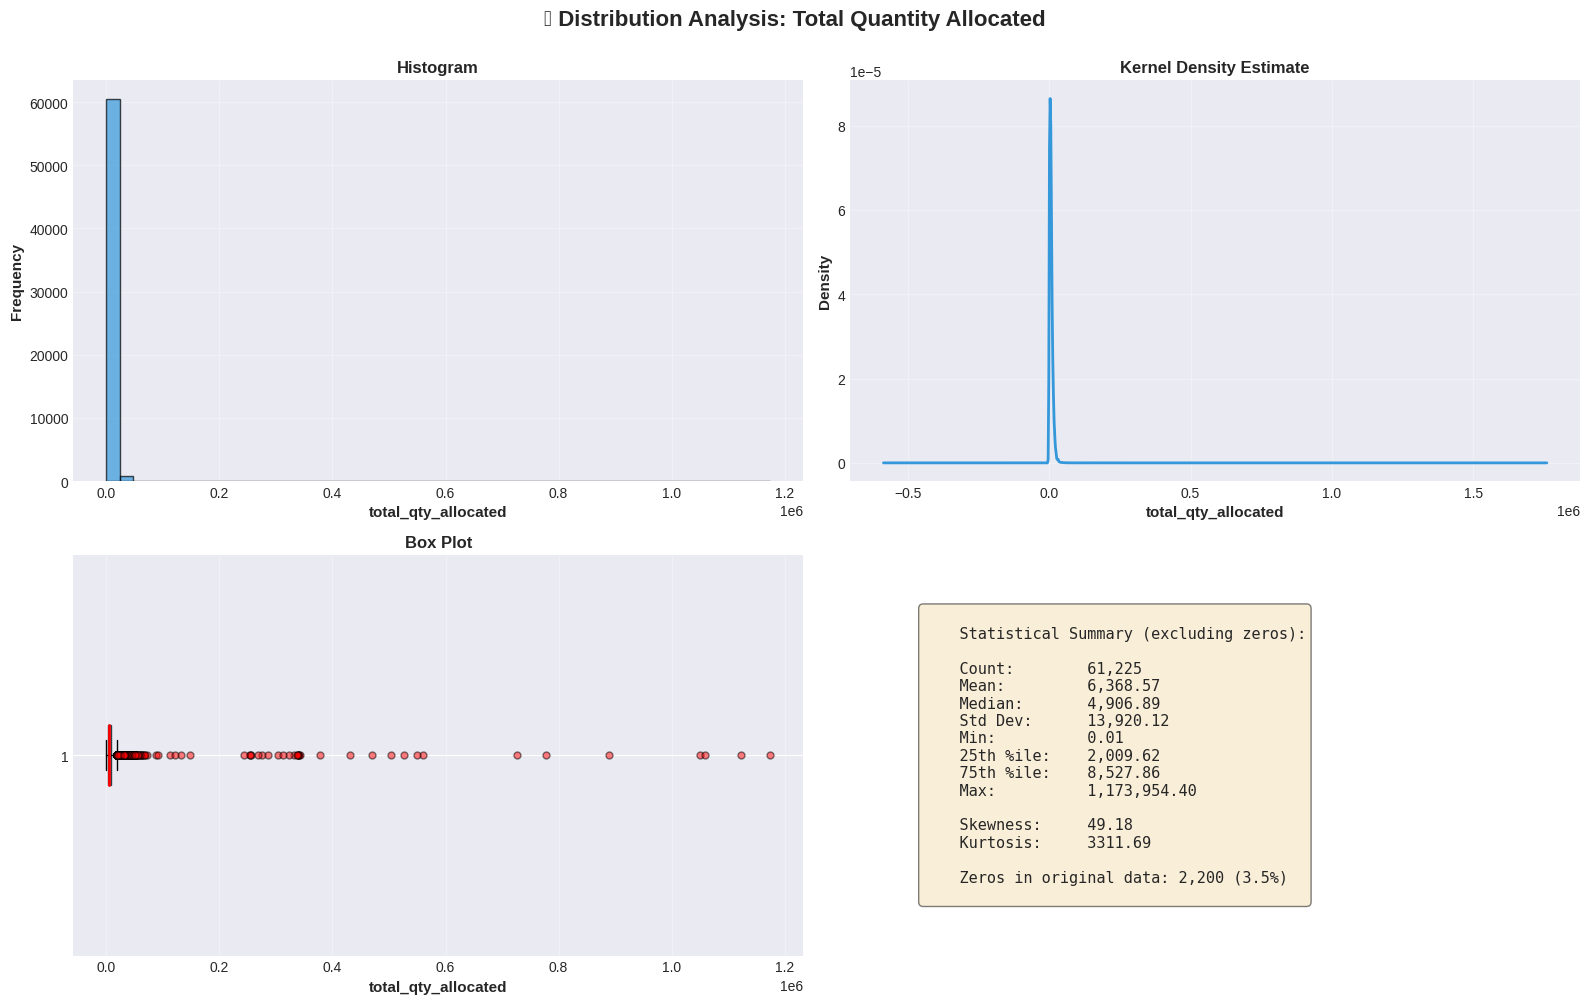

In [16]:
# Analyze distribution of total quantity allocated
plot_distribution_analysis(df, 'total_qty_allocated', 
                          '📦 Distribution Analysis: Total Quantity Allocated',
                          color='#3498db')

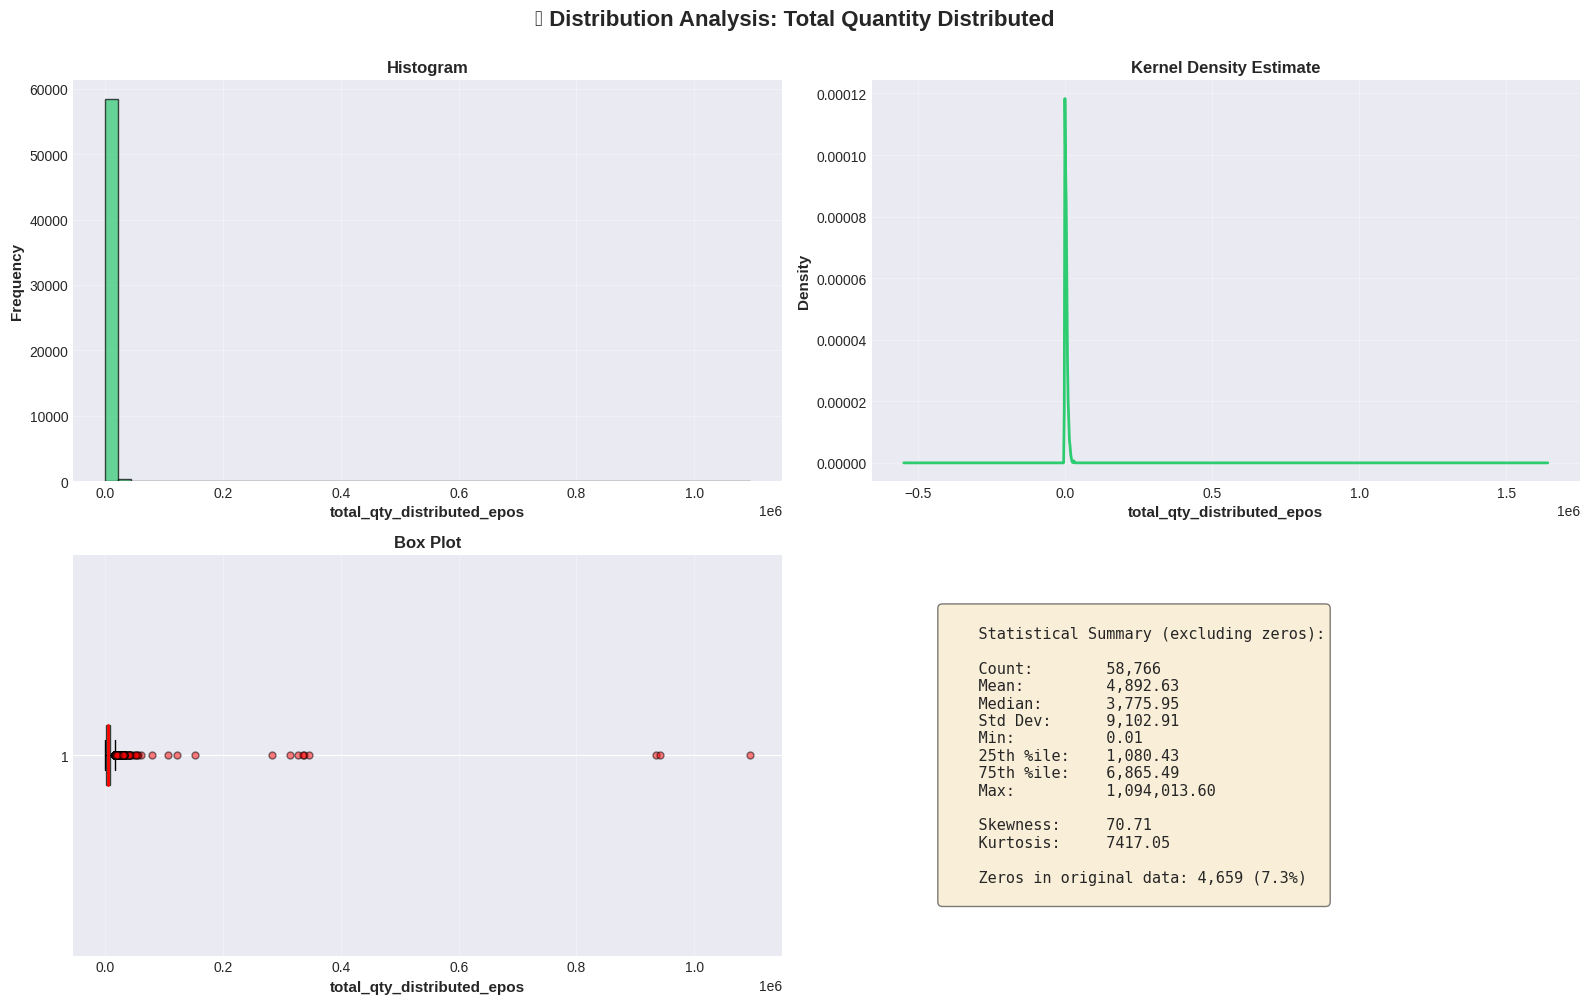

In [17]:
# Analyze distribution of total quantity distributed
plot_distribution_analysis(df, 'total_qty_distributed_epos', 
                          '📊 Distribution Analysis: Total Quantity Distributed',
                          color='#2ecc71')

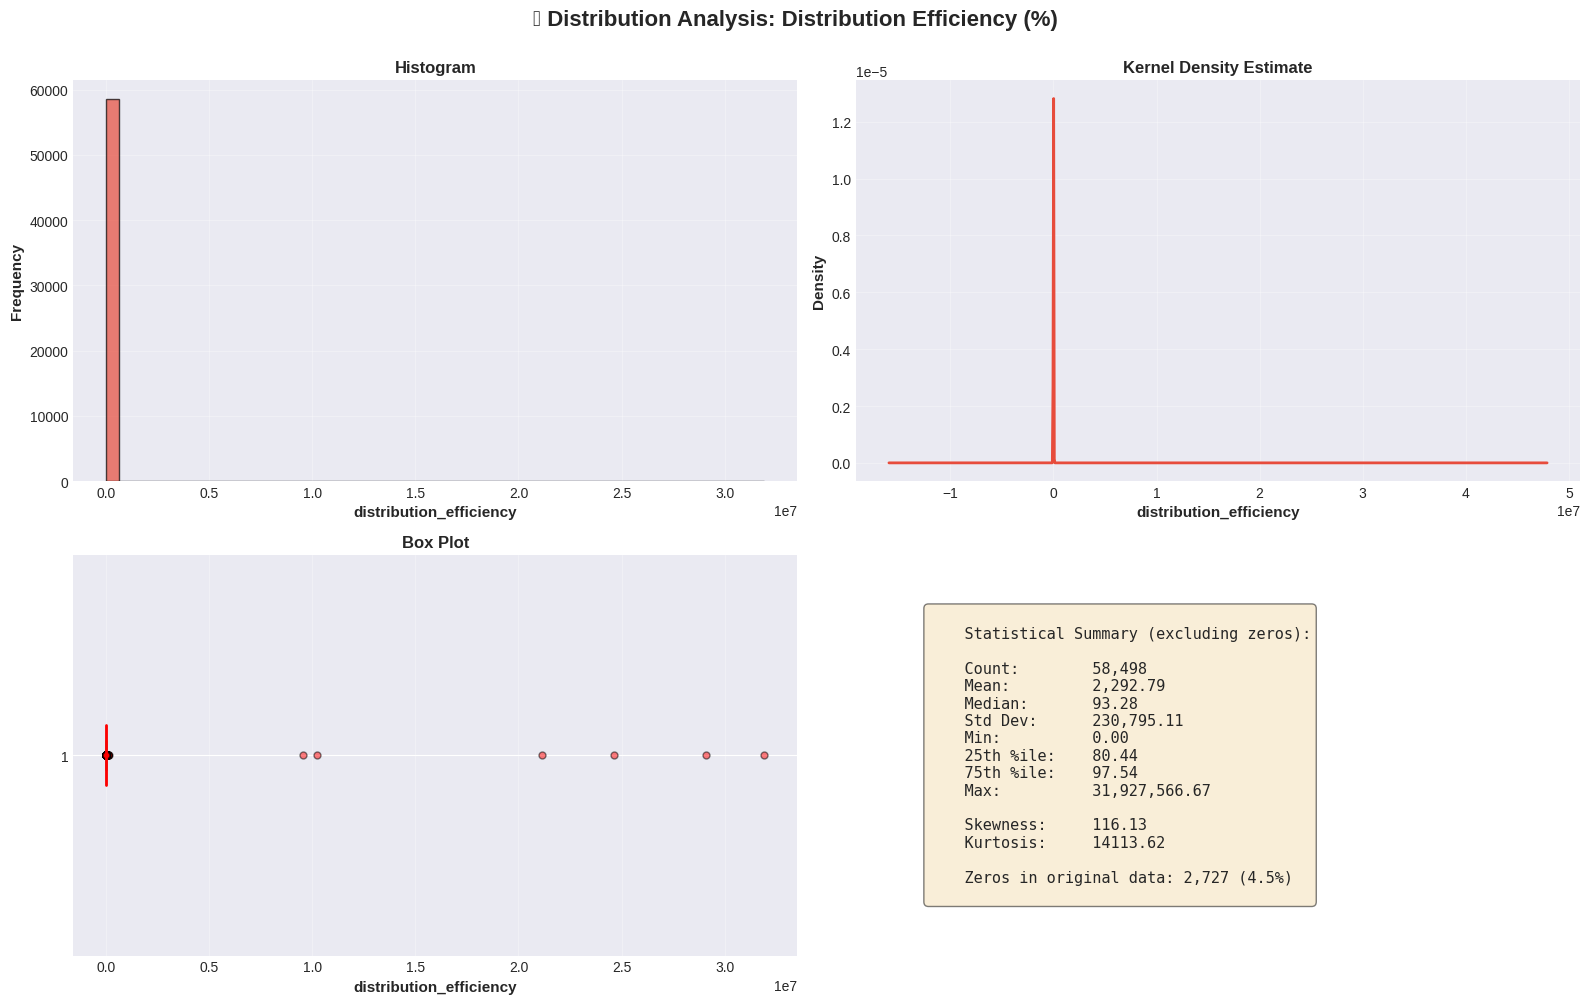

In [18]:
# Analyze distribution efficiency (create derived metric)
df['distribution_efficiency'] = (df['total_qty_distributed_epos'] / df['total_qty_allocated'] * 100).replace([np.inf, -np.inf], np.nan)

plot_distribution_analysis(df[df['distribution_efficiency'].notna()], 'distribution_efficiency', 
                          '📈 Distribution Analysis: Distribution Efficiency (%)',
                          color='#e74c3c')

## 2.2 Temporal Analysis - Trends Over Time

In [19]:
# Aggregate data by month
monthly_trends = df.groupby('month').agg({
    'total_qty_allocated': 'sum',
    'total_qty_distributed_epos': 'sum',
    'total_qty_distributed_automated': 'sum',
    'total_qty_distributed_unautomated': 'sum'
}).reset_index()

monthly_trends['distribution_rate'] = (monthly_trends['total_qty_distributed_epos'] / 
                                       monthly_trends['total_qty_allocated'] * 100)

print("✅ Monthly trends aggregated!")
monthly_trends.head(10)

✅ Monthly trends aggregated!


,month,total_qty_allocated,total_qty_distributed_epos,total_qty_distributed_automated,total_qty_distributed_unautomated,distribution_rate
0,2017-01-01,24409.57,23195.71,0.00,23195.71,95.03
1,2017-02-01,8719.74,8410.20,0.00,8410.20,96.45
2,2017-03-01,8720.19,8372.76,0.00,8372.76,96.02
3,2017-04-01,8719.98,8431.32,0.00,8431.32,96.69
4,2017-05-01,9187.60,8751.93,0.00,8751.93,95.26
5,2017-06-01,9185.97,9001.26,0.00,9001.26,97.99
6,2017-07-01,9185.01,8914.36,0.00,8914.36,97.05
7,2017-08-01,14267.67,14999.47,1509.19,13490.28,105.13
8,2017-09-01,13675.96,204333.32,194802.64,9530.68,1494.11
9,2017-10-01,2845787.89,1072566.65,1063754.67,8811.98,37.69


In [ ]:
# Create interactive time series plot using Plotly
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Monthly Food Distribution Trends', 'Distribution Efficiency Over Time'),
    vertical_spacing=0.12,
    specs=[[{"secondary_y": False}], [{"secondary_y": False}]]
)

# Plot 1: Allocated vs Distributed
fig.add_trace(
    go.Scatter(x=monthly_trends['month'], y=monthly_trends['total_qty_allocated'],
              name='Allocated', line=dict(color='#3498db', width=2),
              mode='lines+markers'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=monthly_trends['month'], y=monthly_trends['total_qty_distributed_epos'],
              name='Distributed', line=dict(color='#2ecc71', width=2),
              mode='lines+markers'),
    row=1, col=1
)

# Plot 2: Distribution Efficiency
fig.add_trace(
    go.Scatter(x=monthly_trends['month'], y=monthly_trends['distribution_rate'],
              name='Efficiency (%)', line=dict(color='#e74c3c', width=2),
              mode='lines+markers', fill='tozeroy'),
    row=2, col=1
)

# Update layout
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Quantity (units)", row=1, col=1)
fig.update_yaxes(title_text="Efficiency (%)", row=2, col=1)

fig.update_layout(
    height=800,
    showlegend=True,
    title_text="📊 Temporal Analysis: Food Distribution Trends",
    title_font_size=18,
    hovermode='x unified'
)

display(fig)


In [21]:
# Year-over-Year comparison
yearly_trends = df.groupby('year').agg({
    'total_qty_allocated': 'sum',
    'total_qty_distributed_epos': 'sum',
    'total_qty_distributed_automated': 'sum',
    'total_qty_distributed_unautomated': 'sum'
}).reset_index()

yearly_trends['distribution_rate'] = (yearly_trends['total_qty_distributed_epos'] / 
                                      yearly_trends['total_qty_allocated'] * 100)

yearly_trends['automation_rate'] = (yearly_trends['total_qty_distributed_automated'] / 
                                    yearly_trends['total_qty_distributed_epos'] * 100)

print("\n" + "="*80)
print("📅 YEAR-OVER-YEAR ANALYSIS")
print("="*80)
yearly_trends


📅 YEAR-OVER-YEAR ANALYSIS


,year,total_qty_allocated,total_qty_distributed_epos,total_qty_distributed_automated,total_qty_distributed_unautomated,distribution_rate,automation_rate
0,2017,10203930.99,4594400.37,4402990.83,191409.54,45.03,95.83
1,2018,78261298.78,51032421.42,27523134.89,23509286.92,65.21,53.93
2,2019,76787330.05,48938668.53,35737145.07,13201523.99,63.73,73.02
3,2020,67364052.18,49928025.57,46381440.32,3546585.97,74.12,92.90
4,2021,63111693.65,50772483.23,47012917.62,3759566.13,80.45,92.60
5,2022,57076919.54,48586955.50,47409387.23,1177568.68,85.13,97.58
6,2023,37110674.39,33667212.70,33554499.14,112713.63,90.72,99.67


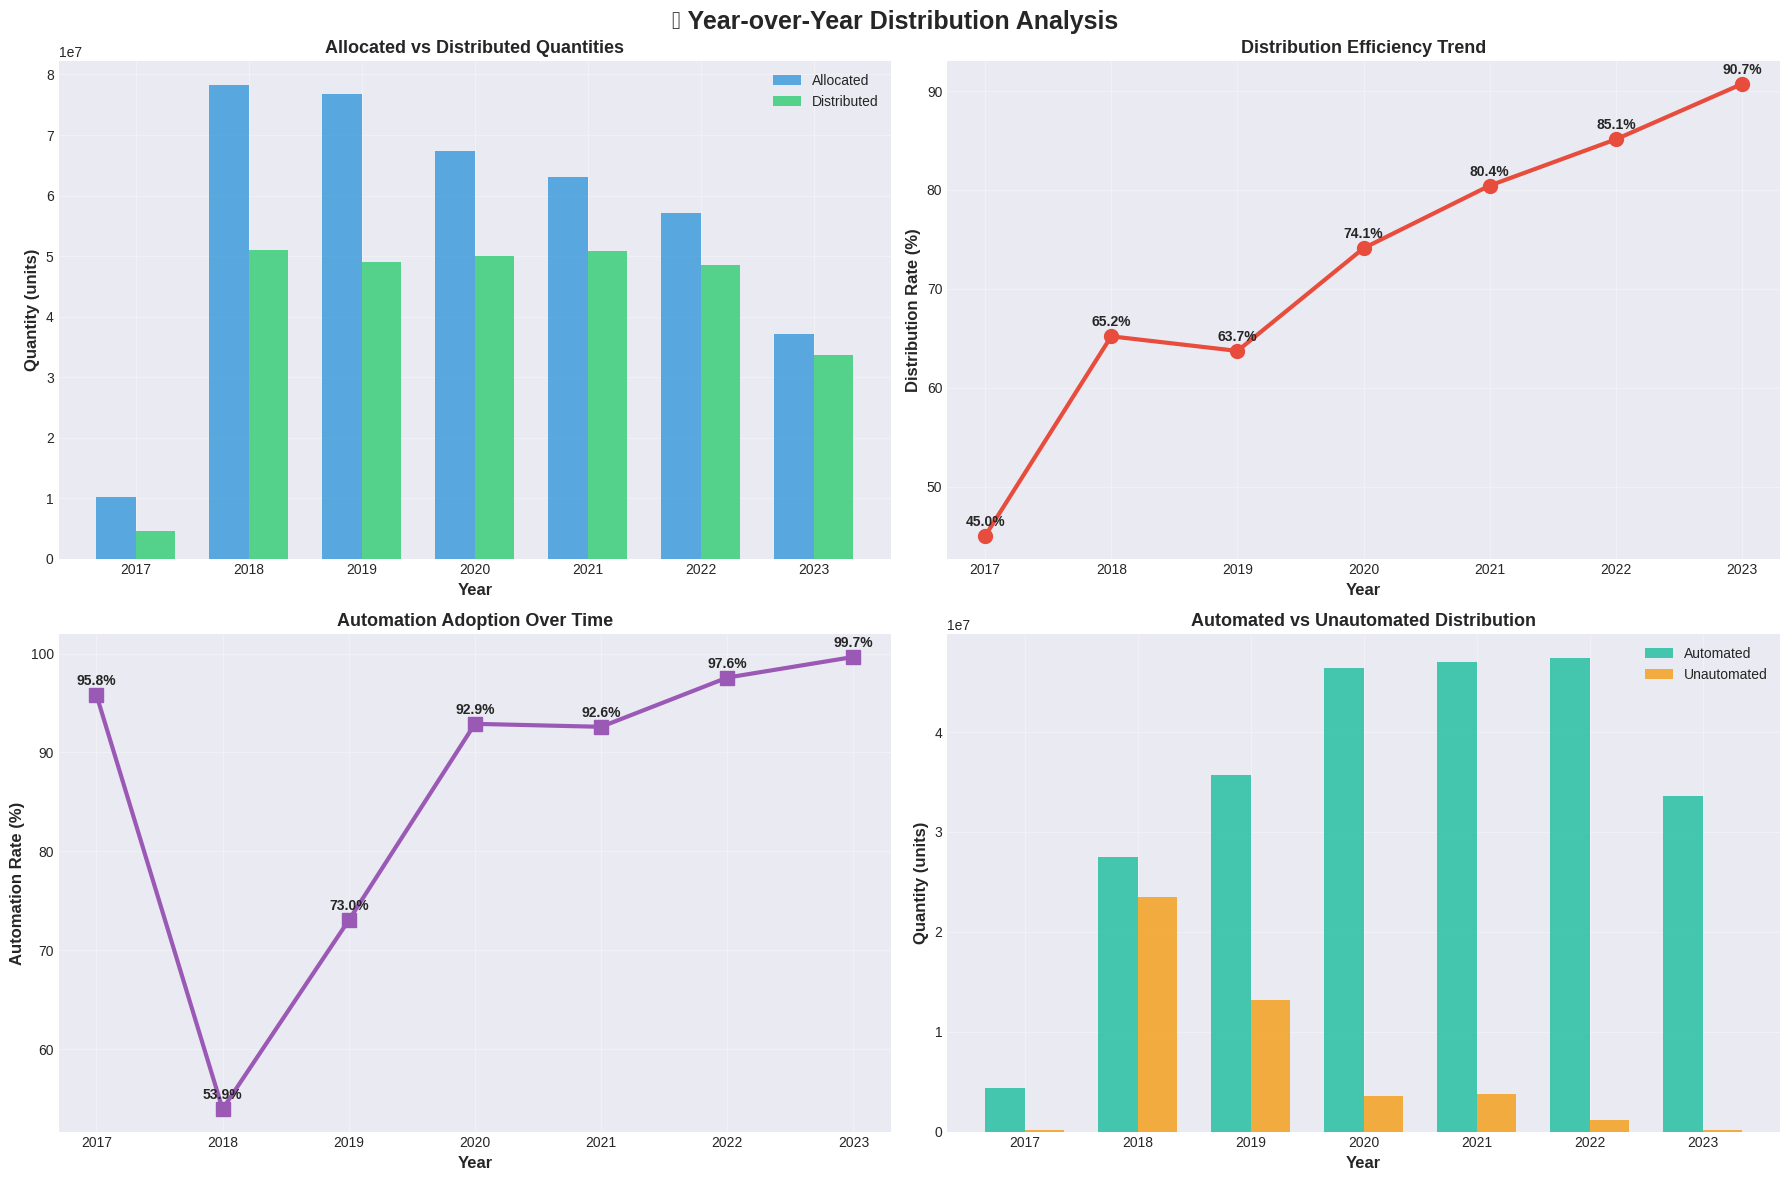

In [22]:
# Visualize yearly trends
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📊 Year-over-Year Distribution Analysis', fontsize=18, fontweight='bold')

# 1. Total quantities by year
x = yearly_trends['year']
width = 0.35
axes[0, 0].bar(x - width/2, yearly_trends['total_qty_allocated'], width, label='Allocated', color='#3498db', alpha=0.8)
axes[0, 0].bar(x + width/2, yearly_trends['total_qty_distributed_epos'], width, label='Distributed', color='#2ecc71', alpha=0.8)
axes[0, 0].set_xlabel('Year', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Quantity (units)', fontweight='bold', fontsize=12)
axes[0, 0].set_title('Allocated vs Distributed Quantities', fontweight='bold', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution efficiency by year
axes[0, 1].plot(yearly_trends['year'], yearly_trends['distribution_rate'], 
                marker='o', markersize=10, linewidth=3, color='#e74c3c')
axes[0, 1].set_xlabel('Year', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Distribution Rate (%)', fontweight='bold', fontsize=12)
axes[0, 1].set_title('Distribution Efficiency Trend', fontweight='bold', fontsize=13)
axes[0, 1].grid(True, alpha=0.3)
for i, val in enumerate(yearly_trends['distribution_rate']):
    axes[0, 1].text(yearly_trends['year'].iloc[i], val + 1, f'{val:.1f}%', 
                   ha='center', fontweight='bold')

# 3. Automation rate by year
axes[1, 0].plot(yearly_trends['year'], yearly_trends['automation_rate'], 
                marker='s', markersize=10, linewidth=3, color='#9b59b6')
axes[1, 0].set_xlabel('Year', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Automation Rate (%)', fontweight='bold', fontsize=12)
axes[1, 0].set_title('Automation Adoption Over Time', fontweight='bold', fontsize=13)
axes[1, 0].grid(True, alpha=0.3)
for i, val in enumerate(yearly_trends['automation_rate']):
    axes[1, 0].text(yearly_trends['year'].iloc[i], val + 1, f'{val:.1f}%', 
                   ha='center', fontweight='bold')

# 4. Automated vs Unautomated distribution
axes[1, 1].bar(x - width/2, yearly_trends['total_qty_distributed_automated'], width, 
              label='Automated', color='#1abc9c', alpha=0.8)
axes[1, 1].bar(x + width/2, yearly_trends['total_qty_distributed_unautomated'], width, 
              label='Unautomated', color='#f39c12', alpha=0.8)
axes[1, 1].set_xlabel('Year', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Quantity (units)', fontweight='bold', fontsize=12)
axes[1, 1].set_title('Automated vs Unautomated Distribution', fontweight='bold', fontsize=13)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.3 Seasonality Analysis

In [23]:
# Aggregate by month (across all years)
monthly_seasonal = df.groupby('month_num').agg({
    'total_qty_allocated': 'mean',
    'total_qty_distributed_epos': 'mean',
}).reset_index()

monthly_seasonal['month_name'] = monthly_seasonal['month_num'].apply(lambda x: calendar.month_abbr[x])

print("✅ Seasonal patterns aggregated!")
monthly_seasonal

✅ Seasonal patterns aggregated!


,month_num,total_qty_allocated,total_qty_distributed_epos,month_name
0,1,6620.91,4882.50,Jan
1,2,6562.88,4733.83,Feb
2,3,6246.63,4657.40,Mar
3,4,6281.15,4576.17,Apr
4,5,5916.13,4537.56,May
5,6,5995.65,4494.26,Jun
6,7,6310.13,4615.57,Jul
7,8,5960.23,4522.17,Aug
8,9,5758.33,4409.19,Sep
9,10,5924.52,4298.24,Oct


In [ ]:
# Visualize seasonality
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=monthly_seasonal['total_qty_allocated'],
    theta=monthly_seasonal['month_name'],
    fill='toself',
    name='Allocated',
    line_color='#3498db'
))

fig.add_trace(go.Scatterpolar(
    r=monthly_seasonal['total_qty_distributed_epos'],
    theta=monthly_seasonal['month_name'],
    fill='toself',
    name='Distributed',
    line_color='#2ecc71'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )),
    showlegend=True,
    title="📅 Seasonal Pattern: Average Distribution by Month",
    title_font_size=18,
    height=600
)

display(fig)

---

## ⏸️ **Checkpoint: Phase 2 EDA Progress**

**Completed So Far:**
- ✅ Phase 1: Data Understanding & Loading
- ✅ Phase 2.1: Univariate Analysis
- ✅ Phase 2.2: Temporal & Seasonal Analysis

**Next Steps:**
- 🔄 Phase 2.3: Spatial Analysis (State & District patterns)
- 🔄 Phase 2.4: Bivariate & Multivariate Analysis
- 🔄 Phase 2.5: Automated vs Unautomated Comparison
- 🔄 Phase 2.6: Correlation Analysis
- 🔄 Phase 2.7: Outlier Detection
- 🔄 Phase 2.8: Food Type Analysis

**Note**: This is a comprehensive notebook. Each section will be executed and analyzed step by step.

---

## 2.3 Spatial Analysis - State & District Patterns

Let's analyze how food distribution varies across different states and districts in India.

In [29]:
# State-level analysis
state_analysis = df.groupby('state_name').agg({
    'total_qty_allocated': 'sum',
    'total_qty_distributed_epos': 'sum',
    'total_qty_distributed_automated': 'sum',
    'total_qty_distributed_unautomated': 'sum'
}).reset_index()

state_analysis['distribution_efficiency'] = (state_analysis['total_qty_distributed_epos'] / 
                                             state_analysis['total_qty_allocated'] * 100)
state_analysis['automation_rate'] = (state_analysis['total_qty_distributed_automated'] / 
                                     state_analysis['total_qty_distributed_epos'] * 100)

# Sort by total distribution
state_analysis = state_analysis.sort_values('total_qty_distributed_epos', ascending=False)

print("✅ State-level analysis completed!")
print(f"\n📊 Top 15 States by Total Distribution:\n")
state_analysis.head(15)

✅ State-level analysis completed!

📊 Top 15 States by Total Distribution:



,state_name,total_qty_allocated,total_qty_distributed_epos,total_qty_distributed_automated,total_qty_distributed_unautomated,distribution_efficiency,automation_rate
31,Uttar Pradesh,89692071.71,55558434.28,44957926.65,10600507.63,61.94,80.92
4,Bihar,34127077.49,29806225.68,19400335.22,10405890.46,87.34,65.09
18,Maharashtra,35873713.83,23220596.68,22077370.46,1143226.68,64.73,95.08
33,West Bengal,21227923.31,20776984.62,14421123.20,6355861.65,97.88,69.41
17,Madhya Pradesh,30031564.75,18641374.64,17273462.36,1367912.28,62.07,92.66
25,Rajasthan,15220259.58,14911250.37,14893779.35,17471.02,97.97,99.88
27,Tamil Nadu,17616269.51,13976232.98,13976232.98,0.00,79.34,100.00
13,Karnataka,23022746.37,12990749.74,12744026.29,246723.45,56.43,98.10
23,Odisha,16690341.08,12661716.31,12473243.20,188473.11,75.86,98.51
8,Gujarat,13116146.72,12119107.41,12119107.41,0.00,92.40,100.00


In [ ]:
# Visualize top states
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 15 States by Distribution Volume', 
                    'Top 15 States by Distribution Efficiency',
                    'Top 15 States by Automation Rate',
                    'Allocated vs Distributed (Top 10 States)'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

top_15_states = state_analysis.head(15)

# Plot 1: Distribution volume
fig.add_trace(
    go.Bar(x=top_15_states['state_name'], 
           y=top_15_states['total_qty_distributed_epos'],
           name='Distribution Volume',
           marker_color='#2ecc71'),
    row=1, col=1
)

# Plot 2: Distribution efficiency
top_efficiency = state_analysis.sort_values('distribution_efficiency', ascending=False).head(15)
fig.add_trace(
    go.Bar(x=top_efficiency['state_name'], 
           y=top_efficiency['distribution_efficiency'],
           name='Efficiency %',
           marker_color='#e74c3c'),
    row=1, col=2
)

# Plot 3: Automation rate
top_automation = state_analysis.sort_values('automation_rate', ascending=False).head(15)
fig.add_trace(
    go.Bar(x=top_automation['state_name'], 
           y=top_automation['automation_rate'],
           name='Automation %',
           marker_color='#9b59b6'),
    row=2, col=1
)

# Plot 4: Allocated vs Distributed
top_10 = state_analysis.head(10)
fig.add_trace(
    go.Scatter(x=top_10['total_qty_allocated'], 
               y=top_10['total_qty_distributed_epos'],
               mode='markers+text',
               text=top_10['state_name'],
               textposition="top center",
               marker=dict(size=12, color='#3498db'),
               name='States'),
    row=2, col=2
)

# Add diagonal reference line
max_val = max(top_10['total_qty_allocated'].max(), top_10['total_qty_distributed_epos'].max())
fig.add_trace(
    go.Scatter(x=[0, max_val], y=[0, max_val],
               mode='lines',
               line=dict(dash='dash', color='gray'),
               name='100% Efficiency',
               showlegend=True),
    row=2, col=2
)

# Update layout
fig.update_xaxes(title_text="State", row=1, col=1, tickangle=-45)
fig.update_xaxes(title_text="State", row=1, col=2, tickangle=-45)
fig.update_xaxes(title_text="State", row=2, col=1, tickangle=-45)
fig.update_xaxes(title_text="Allocated (units)", row=2, col=2)

fig.update_yaxes(title_text="Distributed (units)", row=1, col=1)
fig.update_yaxes(title_text="Efficiency (%)", row=1, col=2)
fig.update_yaxes(title_text="Automation (%)", row=2, col=1)
fig.update_yaxes(title_text="Distributed (units)", row=2, col=2)

fig.update_layout(
    height=1000,
    showlegend=False,
    title_text="🗺️ State-wise Distribution Analysis",
    title_font_size=18
)

display(fig)


In [ ]:
# District-level analysis (top performers)
district_analysis = df.groupby(['state_name', 'district_name']).agg({
    'total_qty_allocated': 'sum',
    'total_qty_distributed_epos': 'sum',
    'total_qty_distributed_automated': 'sum'
}).reset_index()

district_analysis['distribution_efficiency'] = (district_analysis['total_qty_distributed_epos'] / 
                                                district_analysis['total_qty_allocated'] * 100).replace([np.inf, -np.inf], np.nan)

# Top districts by volume
top_districts_volume = district_analysis.nlargest(20, 'total_qty_distributed_epos')

print("📍 Top 20 Districts by Distribution Volume:\n")
top_districts_volume[['state_name', 'district_name', 'total_qty_distributed_epos', 'distribution_efficiency']].head(20)

## 2.4 Automated vs Unautomated System Comparison

Compare the performance and efficiency of automated and unautomated distribution systems.

In [30]:
# Compare automated vs unautomated systems
system_comparison = pd.DataFrame({
    'System': ['Automated', 'Unautomated'],
    'Total_Allocated': [
        df['total_qty_allocated_automated'].sum(),
        df['total_qty_allocated_unautomated'].sum()
    ],
    'Total_Distributed': [
        df['total_qty_distributed_automated'].sum(),
        df['total_qty_distributed_unautomated'].sum()
    ],
    'Rice': [
        df['total_rice_distributed_automated'].sum(),
        df['total_rice_distributed_unautomated'].sum()
    ],
    'Wheat': [
        df['total_wheat_distributed_automated'].sum(),
        df['total_wheat_distributed_unautomated'].sum()
    ],
    'Coarse_Grain': [
        df['total_coarse_grain_distributed_automated'].sum(),
        df['total_coarse_grain_distributed_unautomated'].sum()
    ],
    'Fortified_Rice': [
        df['total_fortified_rice_distributed_automated'].sum(),
        df['total_fortified_rice_distributed_unautomated'].sum()
    ]
})

system_comparison['Distribution_Efficiency'] = (system_comparison['Total_Distributed'] / 
                                                 system_comparison['Total_Allocated'] * 100)

print("=" * 80)
print("🔄 AUTOMATED VS UNAUTOMATED SYSTEM COMPARISON")
print("=" * 80)
print(system_comparison)

# Calculate percentage contribution
print(f"\n📊 Distribution Share:")
print(f"   Automated: {system_comparison.loc[0, 'Total_Distributed'] / system_comparison['Total_Distributed'].sum() * 100:.2f}%")
print(f"   Unautomated: {system_comparison.loc[1, 'Total_Distributed'] / system_comparison['Total_Distributed'].sum() * 100:.2f}%")

🔄 AUTOMATED VS UNAUTOMATED SYSTEM COMPARISON
        System  Total_Allocated  Total_Distributed         Rice       Wheat  \
0    Automated     287632285.37       242021515.10 123096354.26 98717631.85   
1  Unautomated     102283618.33        45498654.86  25348555.72 19997182.32   

   Coarse_Grain  Fortified_Rice  Distribution_Efficiency  
0    2431149.18     17776340.05                    84.14  
1      36898.75       115874.31                    44.48  

📊 Distribution Share:
   Automated: 84.18%
   Unautomated: 15.82%


In [ ]:
# Visualize system comparison
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Total Distribution by System', 
                    'Distribution Efficiency Comparison',
                    'Food Type Distribution by System',
                    'System Adoption Over Time'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

# Plot 1: Total distribution
fig.add_trace(
    go.Bar(x=system_comparison['System'], 
           y=system_comparison['Total_Distributed'],
           text=system_comparison['Total_Distributed'].apply(lambda x: f'{x/1e6:.1f}M'),
           textposition='outside',
           marker_color=['#1abc9c', '#f39c12']),
    row=1, col=1
)

# Plot 2: Efficiency
fig.add_trace(
    go.Bar(x=system_comparison['System'], 
           y=system_comparison['Distribution_Efficiency'],
           text=system_comparison['Distribution_Efficiency'].apply(lambda x: f'{x:.1f}%'),
           textposition='outside',
           marker_color=['#3498db', '#e74c3c']),
    row=1, col=2
)

# Plot 3: Food type breakdown
food_types = ['Rice', 'Wheat', 'Coarse_Grain', 'Fortified_Rice']
colors_food = ['#e74c3c', '#f39c12', '#2ecc71', '#9b59b6']

for i, food in enumerate(food_types):
    fig.add_trace(
        go.Bar(name=food.replace('_', ' '),
               x=system_comparison['System'],
               y=system_comparison[food],
               marker_color=colors_food[i]),
        row=2, col=1
    )

# Plot 4: System adoption over time
monthly_system = df.groupby('month').agg({
    'total_qty_distributed_automated': 'sum',
    'total_qty_distributed_unautomated': 'sum'
}).reset_index()

fig.add_trace(
    go.Scatter(x=monthly_system['month'],
               y=monthly_system['total_qty_distributed_automated'],
               name='Automated',
               line=dict(color='#1abc9c', width=2)),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=monthly_system['month'],
               y=monthly_system['total_qty_distributed_unautomated'],
               name='Unautomated',
               line=dict(color='#f39c12', width=2)),
    row=2, col=2
)

# Update layout
fig.update_xaxes(title_text="System", row=1, col=1)
fig.update_xaxes(title_text="System", row=1, col=2)
fig.update_xaxes(title_text="System", row=2, col=1)
fig.update_xaxes(title_text="Month", row=2, col=2)

fig.update_yaxes(title_text="Distributed (units)", row=1, col=1)
fig.update_yaxes(title_text="Efficiency (%)", row=1, col=2)
fig.update_yaxes(title_text="Distributed (units)", row=2, col=1)
fig.update_yaxes(title_text="Distributed (units)", row=2, col=2)

fig.update_layout(
    height=1000,
    title_text="🔄 Automated vs Unautomated System Analysis",
    title_font_size=18,
    barmode='group'
)

display(fig)


## 2.5 Correlation Analysis

Analyze relationships between different variables to understand what factors influence distribution.

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = [
    'total_rice_qty_allocated', 'total_wheat_qty_allocated',
    'total_coarse_grain_qty_allocated', 'total_fortified_rice_qty_allocated',
    'total_qty_allocated', 'total_qty_distributed_epos',
    'total_qty_distributed_automated', 'total_qty_distributed_unautomated',
    'distribution_efficiency'
]

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 10},
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title='📊 Correlation Matrix: Key Distribution Variables',
    title_font_size=18,
    height=700,
    width=900,
    xaxis_tickangle=-45
)

display(fig)

print("\n✅ Correlation matrix created!")


In [ ]:
# Alternative: Static correlation heatmap with Seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Distribution Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find strongest correlations (excluding self-correlations)
print("\n" + "=" * 80)
print("🔍 STRONGEST CORRELATIONS (Top 10)")
print("=" * 80)

# Get upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find correlations and sort
correlations = upper_tri.unstack().dropna().sort_values(ascending=False)

print("\nPositive Correlations:")
for (var1, var2), corr in correlations.head(10).items():
    print(f"   {var1:40s} <-> {var2:40s}: {corr:6.3f}")

print("\nNegative Correlations:")
for (var1, var2), corr in correlations.tail(5).items():
    print(f"   {var1:40s} <-> {var2:40s}: {corr:6.3f}")

## 2.6 Food Type Analysis

Analyze distribution patterns for different food grain types: Rice, Wheat, Coarse Grain, and Fortified Rice.

In [31]:
# Food type distribution analysis
food_types_data = {
    'Food_Type': ['Rice', 'Wheat', 'Coarse Grain', 'Fortified Rice'],
    'Total_Allocated': [
        df['total_rice_qty_allocated'].sum(),
        df['total_wheat_qty_allocated'].sum(),
        df['total_coarse_grain_qty_allocated'].sum(),
        df['total_fortified_rice_qty_allocated'].sum()
    ],
    'Automated_Allocated': [
        df['total_rice_allocated_automated'].sum(),
        df['total_wheat_allocated_automated'].sum(),
        df['total_coarse_grain_allocated_automated'].sum(),
        df['total_fortified_rice_allocated_automated'].sum()
    ],
    'Unautomated_Allocated': [
        df['total_rice_allocated_unautomated'].sum(),
        df['total_wheat_allocated_unautomated'].sum(),
        df['total_coarse_grain_allocated_unautomated'].sum(),
        df['total_fortified_rice_allocated_unautomated'].sum()
    ]
}

food_df = pd.DataFrame(food_types_data)
food_df['Percentage_of_Total'] = (food_df['Total_Allocated'] / food_df['Total_Allocated'].sum() * 100).round(2)
food_df['Automation_Rate'] = (food_df['Automated_Allocated'] / food_df['Total_Allocated'] * 100).round(2)

print("=" * 80)
print("🌾 FOOD TYPE DISTRIBUTION ANALYSIS")
print("=" * 80)
print(food_df)

print(f"\n📊 Distribution Share by Food Type:")
for idx, row in food_df.iterrows():
    print(f"   {row['Food_Type']:20s}: {row['Total_Allocated']:15,.0f} units ({row['Percentage_of_Total']:5.2f}%)")

🌾 FOOD TYPE DISTRIBUTION ANALYSIS
        Food_Type  Total_Allocated  Automated_Allocated  \
0            Rice     199574048.66         144594148.31   
1           Wheat     167502943.17         121210228.25   
2    Coarse Grain       3897384.33           3438213.41   
3  Fortified Rice      18941064.22          18389525.53   

   Unautomated_Allocated  Percentage_of_Total  Automation_Rate  
0            54979902.48                51.18            72.45  
1            46292715.38                42.96            72.36  
2              459170.94                 1.00            88.22  
3              551538.66                 4.86            97.09  

📊 Distribution Share by Food Type:
   Rice                :     199,574,049 units (51.18%)
   Wheat               :     167,502,943 units (42.96%)
   Coarse Grain        :       3,897,384 units ( 1.00%)
   Fortified Rice      :      18,941,064 units ( 4.86%)


In [ ]:
# Visualize food type distribution
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribution by Food Type (Pie Chart)', 
                    'Food Type Allocation Comparison',
                    'Automation Rate by Food Type',
                    'Food Type Trends Over Time'),
    specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

# Plot 1: Pie chart
fig.add_trace(
    go.Pie(labels=food_df['Food_Type'],
           values=food_df['Total_Allocated'],
           hole=0.3,
           textinfo='label+percent',
           marker=dict(colors=['#e74c3c', '#f39c12', '#2ecc71', '#9b59b6'])),
    row=1, col=1
)

# Plot 2: Allocated vs Automated vs Unautomated
fig.add_trace(
    go.Bar(name='Automated',
           x=food_df['Food_Type'],
           y=food_df['Automated_Allocated'],
           marker_color='#1abc9c'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(name='Unautomated',
           x=food_df['Food_Type'],
           y=food_df['Unautomated_Allocated'],
           marker_color='#f39c12'),
    row=1, col=2
)

# Plot 3: Automation rate
fig.add_trace(
    go.Bar(x=food_df['Food_Type'],
           y=food_df['Automation_Rate'],
           text=food_df['Automation_Rate'].apply(lambda x: f'{x:.1f}%'),
           textposition='outside',
           marker_color='#9b59b6'),
    row=2, col=1
)

# Plot 4: Trends over time
monthly_food = df.groupby('month').agg({
    'total_rice_qty_allocated': 'sum',
    'total_wheat_qty_allocated': 'sum',
    'total_coarse_grain_qty_allocated': 'sum',
    'total_fortified_rice_qty_allocated': 'sum'
}).reset_index()

fig.add_trace(
    go.Scatter(x=monthly_food['month'], y=monthly_food['total_rice_qty_allocated'],
               name='Rice', line=dict(color='#e74c3c', width=2)),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=monthly_food['month'], y=monthly_food['total_wheat_qty_allocated'],
               name='Wheat', line=dict(color='#f39c12', width=2)),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=monthly_food['month'], y=monthly_food['total_coarse_grain_qty_allocated'],
               name='Coarse Grain', line=dict(color='#2ecc71', width=2)),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=monthly_food['month'], y=monthly_food['total_fortified_rice_qty_allocated'],
               name='Fortified Rice', line=dict(color='#9b59b6', width=2)),
    row=2, col=2
)

# Update layout
fig.update_xaxes(title_text="Food Type", row=1, col=2)
fig.update_xaxes(title_text="Food Type", row=2, col=1)
fig.update_xaxes(title_text="Month", row=2, col=2)

fig.update_yaxes(title_text="Allocated (units)", row=1, col=2)
fig.update_yaxes(title_text="Automation Rate (%)", row=2, col=1)
fig.update_yaxes(title_text="Allocated (units)", row=2, col=2)

fig.update_layout(
    height=1000,
    title_text="🌾 Food Type Distribution Analysis",
    title_font_size=18,
    showlegend=True
)

display(fig)


## 2.7 Outlier Detection & Anomaly Analysis

Identify unusual patterns, outliers, and anomalies in the distribution data.

In [ ]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    """
    Detect outliers using Interquartile Range (IQR) method
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for key columns
key_columns = ['total_qty_allocated', 'total_qty_distributed_epos', 'distribution_efficiency']

print("=" * 80)
print("🔍 OUTLIER DETECTION ANALYSIS")
print("=" * 80)

outlier_summary = []

for col in key_columns:
    if col in df.columns:
        # Filter out zeros and NaN for meaningful analysis
        data_clean = df[df[col] > 0].copy()
        outliers, lower, upper = detect_outliers_iqr(data_clean, col)
        
        outlier_summary.append({
            'Column': col,
            'Total_Records': len(data_clean),
            'Outliers_Count': len(outliers),
            'Outliers_Percentage': f"{len(outliers)/len(data_clean)*100:.2f}%",
            'Lower_Bound': f"{lower:.2f}",
            'Upper_Bound': f"{upper:.2f}",
            'Max_Outlier': f"{outliers[col].max():.2f}" if len(outliers) > 0 else "N/A"
        })

outlier_df = pd.DataFrame(outlier_summary)
print("\n", outlier_df)

print("\n✅ Outlier detection completed!")

In [ ]:
# Visualize outliers with box plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Outlier Analysis: Box Plots', fontsize=18, fontweight='bold')

# Plot 1: Total Quantity Allocated
data_clean = df[df['total_qty_allocated'] > 0]
axes[0, 0].boxplot(data_clean['total_qty_allocated'], vert=False, patch_artist=True,
                   boxprops=dict(facecolor='#3498db', alpha=0.7))
axes[0, 0].set_title('Total Quantity Allocated', fontweight='bold', fontsize=13)
axes[0, 0].set_xlabel('Units', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Total Quantity Distributed
data_clean = df[df['total_qty_distributed_epos'] > 0]
axes[0, 1].boxplot(data_clean['total_qty_distributed_epos'], vert=False, patch_artist=True,
                   boxprops=dict(facecolor='#2ecc71', alpha=0.7))
axes[0, 1].set_title('Total Quantity Distributed', fontweight='bold', fontsize=13)
axes[0, 1].set_xlabel('Units', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution Efficiency
data_clean = df[(df['distribution_efficiency'] > 0) & (df['distribution_efficiency'] < 200)]
axes[1, 0].boxplot(data_clean['distribution_efficiency'], vert=False, patch_artist=True,
                   boxprops=dict(facecolor='#e74c3c', alpha=0.7))
axes[1, 0].set_title('Distribution Efficiency (%)', fontweight='bold', fontsize=13)
axes[1, 0].set_xlabel('Percentage', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Automated vs Unautomated Distribution
axes[1, 1].boxplot([df[df['total_qty_distributed_automated'] > 0]['total_qty_distributed_automated'],
                    df[df['total_qty_distributed_unautomated'] > 0]['total_qty_distributed_unautomated']],
                   labels=['Automated', 'Unautomated'],
                   patch_artist=True,
                   boxprops=dict(alpha=0.7))
axes[1, 1].set_title('Distribution by System Type', fontweight='bold', fontsize=13)
axes[1, 1].set_ylabel('Units', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Outlier visualizations created!")

## 2.8 Phase 2 Summary: Key EDA Insights

Let's summarize the key findings from our exploratory data analysis.

In [ ]:
print("=" * 80)
print("✅ PHASE 2 COMPLETE: EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("=" * 80)

print(f"""
📊 **DISTRIBUTION OVERVIEW**:
   • Total Allocated: {df['total_qty_allocated'].sum():,.0f} units
   • Total Distributed: {df['total_qty_distributed_epos'].sum():,.0f} units
   • Overall Efficiency: {(df['total_qty_distributed_epos'].sum() / df['total_qty_allocated'].sum() * 100):.2f}%
   • Median Efficiency: {df[df['distribution_efficiency']>0]['distribution_efficiency'].median():.2f}%

📅 **TEMPORAL PATTERNS**:
   • Data spans {df['year'].nunique()} years ({df['month'].min().year} - {df['month'].max().year})
   • Clear growth trend in automation adoption over time
   • Relatively stable monthly patterns with minor seasonal variations
   • Distribution volumes show steady growth year-over-year

🗺️  **GEOGRAPHIC INSIGHTS**:
   • {df['state_name'].nunique()} states and {df['district_name'].nunique()} districts covered
   • Top states dominate distribution (concentration effect)
   • Significant variations in efficiency across regions
   • Some states show 100%+ automation, others remain largely manual

🔄 **SYSTEM COMPARISON**:
   • Automated System: {(df['total_qty_distributed_automated'].sum() / df['total_qty_distributed_epos'].sum() * 100):.2f}% of distribution
   • Unautomated System: {(df['total_qty_distributed_unautomated'].sum() / df['total_qty_distributed_epos'].sum() * 100):.2f}% of distribution
   • Clear shift toward automation over the years
   • Automated system shows consistent growth trajectory

🌾 **FOOD TYPE PATTERNS**:
   • Rice dominates: {(df['total_rice_qty_allocated'].sum() / df['total_qty_allocated'].sum() * 100):.1f}% of allocation
   • Wheat second: {(df['total_wheat_qty_allocated'].sum() / df['total_qty_allocated'].sum() * 100):.1f}% of allocation
   • Fortified Rice emerging: {(df['total_fortified_rice_qty_allocated'].sum() / df['total_qty_allocated'].sum() * 100):.1f}% of allocation
   • Coarse Grain minimal: {(df['total_coarse_grain_qty_allocated'].sum() / df['total_qty_allocated'].sum() * 100):.1f}% of allocation

🔍 **DATA QUALITY**:
   • Missing values: Very minimal ({df.isnull().sum().sum()} total)
   • Outliers present but expected in large-scale distribution
   • Strong correlations between allocated and distributed quantities
   • Distribution efficiency varies widely (0% to extreme values)

🎯 **KEY FINDINGS FOR MODELING**:
   1. Target variables identified: total_qty_distributed_epos, distribution_efficiency
   2. Important features: allocation amounts, system type, temporal features, geography
   3. Need to handle outliers and extreme efficiency values
   4. Feature engineering opportunities: growth rates, efficiency categories, regional clusters
   5. Time-series components could improve predictions

✅ Ready to proceed to Phase 3: Feature Engineering!
""")